In [6]:
import pandas as pd
import seaborn as sns

In [7]:
#Llamada a la API sería: https://archive-api.open-meteo.com/v1/archive?latitude=40.7143&longitude=-74.006&start_date=2021-01-01&end_date=2023-08-04&hourly=apparent_temperature,rain,snowfall&timezone=America%2FNew_York
df = pd.read_csv('..\Datasets\weather_nyc_temperature_rain_snowfall_raw.csv', skiprows=3)
#Con skiprows omitimos la primera información sobre latitud, longitud, y huso horario de NYC ya que es innecesaria.
df

,time,apparent_temperature (°C),rain (mm),snowfall (cm)
0,2014-01-01T00:00,-9.5,0.0,0.0
1,2014-01-01T01:00,-9.8,0.0,0.0
2,2014-01-01T02:00,-9.8,0.0,0.0
3,2014-01-01T03:00,-9.9,0.0,0.0
4,2014-01-01T04:00,-10.0,0.0,0.0
...,...,...,...,...
84115,2023-08-06T19:00,NaN,NaN,NaN
84116,2023-08-06T20:00,NaN,NaN,NaN
84117,2023-08-06T21:00,NaN,NaN,NaN
84118,2023-08-06T22:00,NaN,NaN,NaN


<AxesSubplot:>

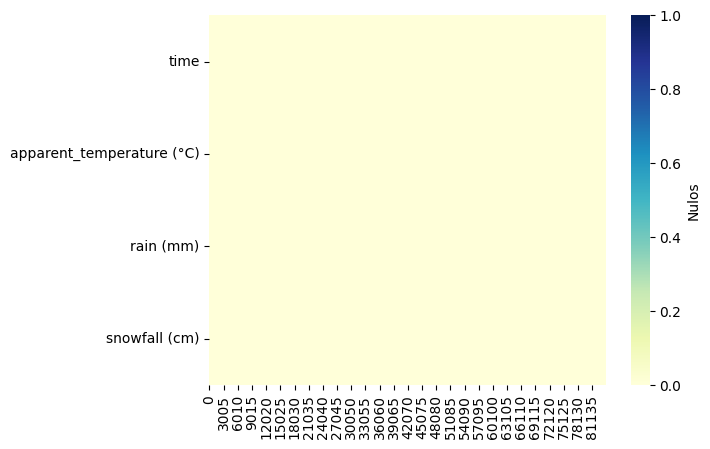

In [8]:
sns.heatmap(df.isna().transpose(), #Visualizamos los nulos, vemos que solo hay algunos faltantes en las fechas mas recientes
            cmap="YlGnBu",
            cbar_kws={'label': 'Nulos'})  

In [9]:
print(df[df.isnull().any(axis=1)]) #Comprobamos esto y procedemos a eliminarlos
df.dropna(axis=0,inplace=True)

                   time  apparent_temperature (°C)  rain (mm)  snowfall (cm)
84092  2023-08-05T20:00                        NaN        NaN            NaN
84093  2023-08-05T21:00                        NaN        NaN            NaN
84094  2023-08-05T22:00                        NaN        NaN            NaN
84095  2023-08-05T23:00                        NaN        NaN            NaN
84096  2023-08-06T00:00                        NaN        NaN            NaN
84097  2023-08-06T01:00                        NaN        NaN            NaN
84098  2023-08-06T02:00                        NaN        NaN            NaN
84099  2023-08-06T03:00                        NaN        NaN            NaN
84100  2023-08-06T04:00                        NaN        NaN            NaN
84101  2023-08-06T05:00                        NaN        NaN            NaN
84102  2023-08-06T06:00                        NaN        NaN            NaN
84103  2023-08-06T07:00                        NaN        NaN            NaN

In [10]:
df.to_csv('..\Datasets_procesados_varios\weather_nyc_temperature_rain_snowfall.csv', index=False)